## Statistical Relational Learning
In this exercise we will study use of linear regression to approximate nonlinear functions. Further we will focus on understanding the goal of learning by analyzing loss and risk as discussed in lecture.

For given data points $(\mathbf{X},\mathbf{Y})= ((x_1,y_1)....,(x_n,y_n))$ with input $x_i = (x_{i1},...,x_{im})^T$ and target $y_i = (y_{1},...y_{n})$ linear regression model is defined as

$y_{i} = w_1x_{i1}+ ...+w_{m}x_{im} + \epsilon_i = x_{i}^T$

In vector form:

$Y = \mathbf{W}\mathbf{X}^T + \epsilon$

or

$Y = \mathbf{X}\mathbf{W} + \epsilon$

where W is an unknown parameter and $\epsilon$ is a prediction error. $\epsilon$ is a noise accounts for unmodeled effects not included in the model function. To approximate unknown we define a loss function minimizing Empirical Risk:

$L = argmin_{W} ||\mathbf{W}\mathbf{X}^T - Y||^2$ 

We solve above optimization problem with Least Square Methods. To perform the minimization we take derivative of  $\mathbf{L}$  with respect to the parameter $\mathbf{w}$ and eqaute it to zero. Further simplifying the equation we get following closed form expression for $\mathbf{w}$:
  
$\mathbf{W} = \mathbf{Y}\mathbf{X^T}\left(\mathbf{X}\mathbf{X^T}\right)^{-1}$ 

Depending on vector representation in calculation of Y the other possible closed form expression for W can be:

$\mathbf{W} = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{Y}$ 
    
   
  

  # Exercise-3.1
  
  In this part we will simulate some data and study effect of under/over-fitting using linear regression model. 
   
  (i) Underfitting: model is not sufficient to fit the data. It ignores important, discriminative features of data thus resulting in under generalization. Underfit model has very high empirical risk. It usually means model is not learning.
  
  (ii)Overfitting: model very precisely captures noise of data thus resulting in over generalization. Overfit model has a very low empirical risk. 

weight= [ 0.92998743]
weight= [ 0.7565486   3.21872336  0.51011422 -1.33723481]
weight= [  3.29926123e-01   2.33107802e+00   4.40985583e+01   5.92447754e+00
  -7.89974682e+02  -1.49512037e+02   5.99221461e+03   9.44932424e+02
  -2.34816404e+04  -2.35921373e+03   5.11175650e+04   2.71874252e+03
  -6.21766013e+04  -1.41254000e+03   3.94519780e+04   2.50392513e+02
  -1.01563995e+04]


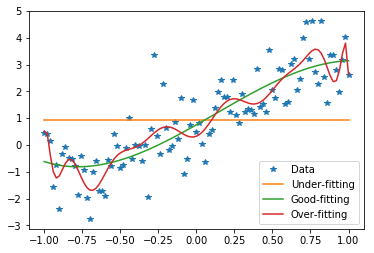

In [27]:
import numpy as np
from matplotlib import pyplot as plt
import math

seed = 123456789
np.random.seed(seed)

# Define Some function to approximate
def y(x, w1, w2, w3, mu=0, sigma=1): 
    return w1*np.sin(x) + w2*np.cos(x) + w3 + np.random.normal(mu,sigma,len(x))

# Generate Polynomial features
def polynomial_features(x,pow):
    temp = x
    for i in range(pow-1):
        temp = temp * x
    return temp

def prediction(params, x):
    pred = 0
    for i in range(len(params)):
        pred += params[i]*math.pow(x,i)
    return pred

# Data with N points
N = 101
# Generate Some 
data_X = np.linspace(-1,1,N)
data_Y = y(data_X, w1=2.89, w2 = 0.5, w3=0.4)

def fit_model(degree, data_X):
    X = [np.ones(N)]
    for i in range(1,degree):
        X.append(polynomial_features(data_X, i))
    # X Matrix with polynomial features M X N
    # 1st Closed form expression
    X = np.array(X)
    W = np.dot(data_Y,np.dot(X.T,np.linalg.pinv(np.dot(X,X.T))))
    # X Matrix with polynomial features, N X M
    # 2nd Closed form expression
    # X = np.array(X).T
    # W = np.dot(np.dot(np.linalg.pinv(np.dot(X.T,X)), X.T), data_Y)
    print('weight=',W)
    predicted_Y = [prediction(W,x) for x in data_X]
    return predicted_Y

# Plot Data
plt.plot(data_X,data_Y,'*')

#Underfit
predicted_Y1 = fit_model(1, data_X) 
plt.plot(data_X, predicted_Y1)

#Goodfit
predicted_Y2 = fit_model(4, data_X) 

plt.plot(data_X, predicted_Y2)

#Overfit
predicted_Y3 = fit_model(17, data_X) 
plt.plot(data_X,predicted_Y3)
plt.legend(('Data','Under-fitting','Good-fitting','Over-fitting'), loc='lower right')
plt.show()

In above example we analyzed the effect of under-fitting and over-fitting on data. We observed overfit model despite of having a low empirical risk does not generalize well. 
In next part we will study an important technique to adjust the fitting capacity of model. It helps in preventing model from over generalization.

# Exercise-3.2
In this part define some function of your choice and approximate it using linear regression model. Also demonstrate effect of over and under fitting.


In [28]:
def y(x, w1, w2, w3, mu=0, sigma=1): 
    # CODE HERE
    fun = x
    return fun + np.random.normal(mu,sigma,len(x))

In [29]:
# Generate Data points

# Generate Some Data: data_X, data_Y and try to approximate best curve using linear regression model.
# Code Here


## Exercise-3.3
## Regularization To Control Overfitting

Regularization is done to address problem of overfitting for a given model. Regularization adds a penality on parameters of model thus ruling out high complexity models. In regularization loss function with structural risk minimization (SRM) principle. SRM helps in finding a simplest model with best empirical error. The general loss function with a regularization term is given by 

$L = E_D(\mathbf{w}) + \lambda E_W(\mathbf{w})$

where $\lambda$ is the regularization coefficient and $E_W$ is the regularization term. In this example we will use sum-of-squares of the model parameters also known as <em>weight decay</em> regularizer.

 $E_W(\mathbf{w}) = \frac1{2}\mathbf{w}^T\mathbf{w}$
 
 Again using the Least Square method we obtain following solution for linear regression model. 
 
 $\mathbf{W} = \mathbf{Y}\mathbf{X^T}\left(\mathbf{X}\mathbf{X^T} + \lambda \mathbf{I}\right)^{-1}$ 
 

weight= [ 0.80542586  2.39186336  0.21917285  1.19048021  0.00635975 -0.20605179
 -0.01623308 -0.69543021 -0.03243614 -0.68970428  0.01059849 -0.49786903
  0.10590315 -0.26899474  0.23015475 -0.0633075   0.36246124]


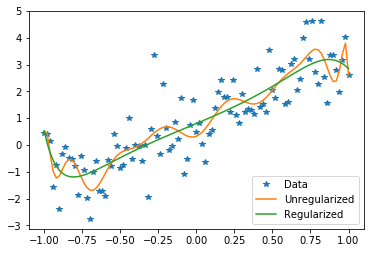

In [30]:
def fit_regularized_model(degree, la, data_X):
    X = [np.ones(N)]
    for i in range(1,degree):
        X.append(polynomial_features(data_X, i))
    #X Matrix wit polynomial features, N X M
    X = np.array(X)
    M = np.shape(X)[0]
    W = np.dot(data_Y,np.dot(X.T,np.linalg.pinv(np.dot(X,X.T) + la*np.eye(M))))
    print('weight=',W)
    predicted_Y = [prediction(W,x) for x in data_X]
    return predicted_Y
# Data Poit
plt.plot(data_X, data_Y, '*')
# Without Regularization
plt.plot(data_X, predicted_Y3)
predicted_Y4 = fit_regularized_model(17, 0.3, data_X) 
# With Regularization
plt.plot(data_X, predicted_Y4)
plt.legend(('Data','Unregularized','Regularized'), loc='lower right')
plt.show()

## Exercise-3.4
In all above parts we used $Y = \mathbf{W}\mathbf{X}^T + \epsilon$ vector formulation. For this part derive the solution for 2nd vector form: $Y = \mathbf{X}\mathbf{W} + \epsilon$ using Least Square method and implement it. Further show that both formulation will result in a same solution. Also analyze the effect of under/over fitting for some arbitrary function of your choice.

In [31]:
#########################################
### Code Here 
#########################################

## Exercise-3.5
In this part we will study platt-scaling function. Platt-scaling function is used for probabilistic interpretation of score based model.

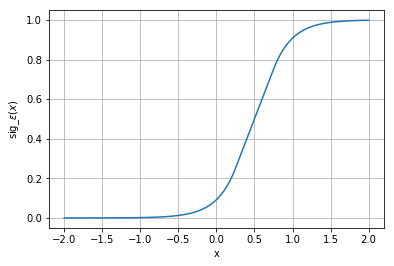

In [56]:
def sig_epsilon(x, epsilon):
    e = np.exp(1)
    if x<= epsilon:
        sig = (epsilon/e)*np.exp(x/epsilon)
    elif epsilon <=x and x<= 1-epsilon:
        sig = x
    else:
        sig = 1 - (epsilon/e)*np.exp((1-x)/epsilon)
    return sig

def platt_scal(x,epsilon):
    sig = np.empty(len(x))
    for i in range(len(x)):
        sig[i] = sig_epsilon(x[i], epsilon)
    return sig

x = np.linspace(-2,2,100)
epsilon = 0.25
sig = platt_scal(x,epsilon)
plt.plot(x, sig)
plt.xlabel('x')
plt.ylabel('sig_$\epsilon(x)$')
plt.grid(True)
plt.show()